**Importing the Dependies**

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay
from joblib import Parallel, delayed
import shutil,math
columns = shutil.get_terminal_size().columns
import warnings
warnings.filterwarnings("ignore")
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [141]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Data collection and Analysis**

In [142]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('./Parkinsson disease.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [143]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [144]:
# number of rows and columns in the dataframe
df.shape

(195, 24)

In [145]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [146]:
# checking for missing values in each column
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [147]:
# getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot: >

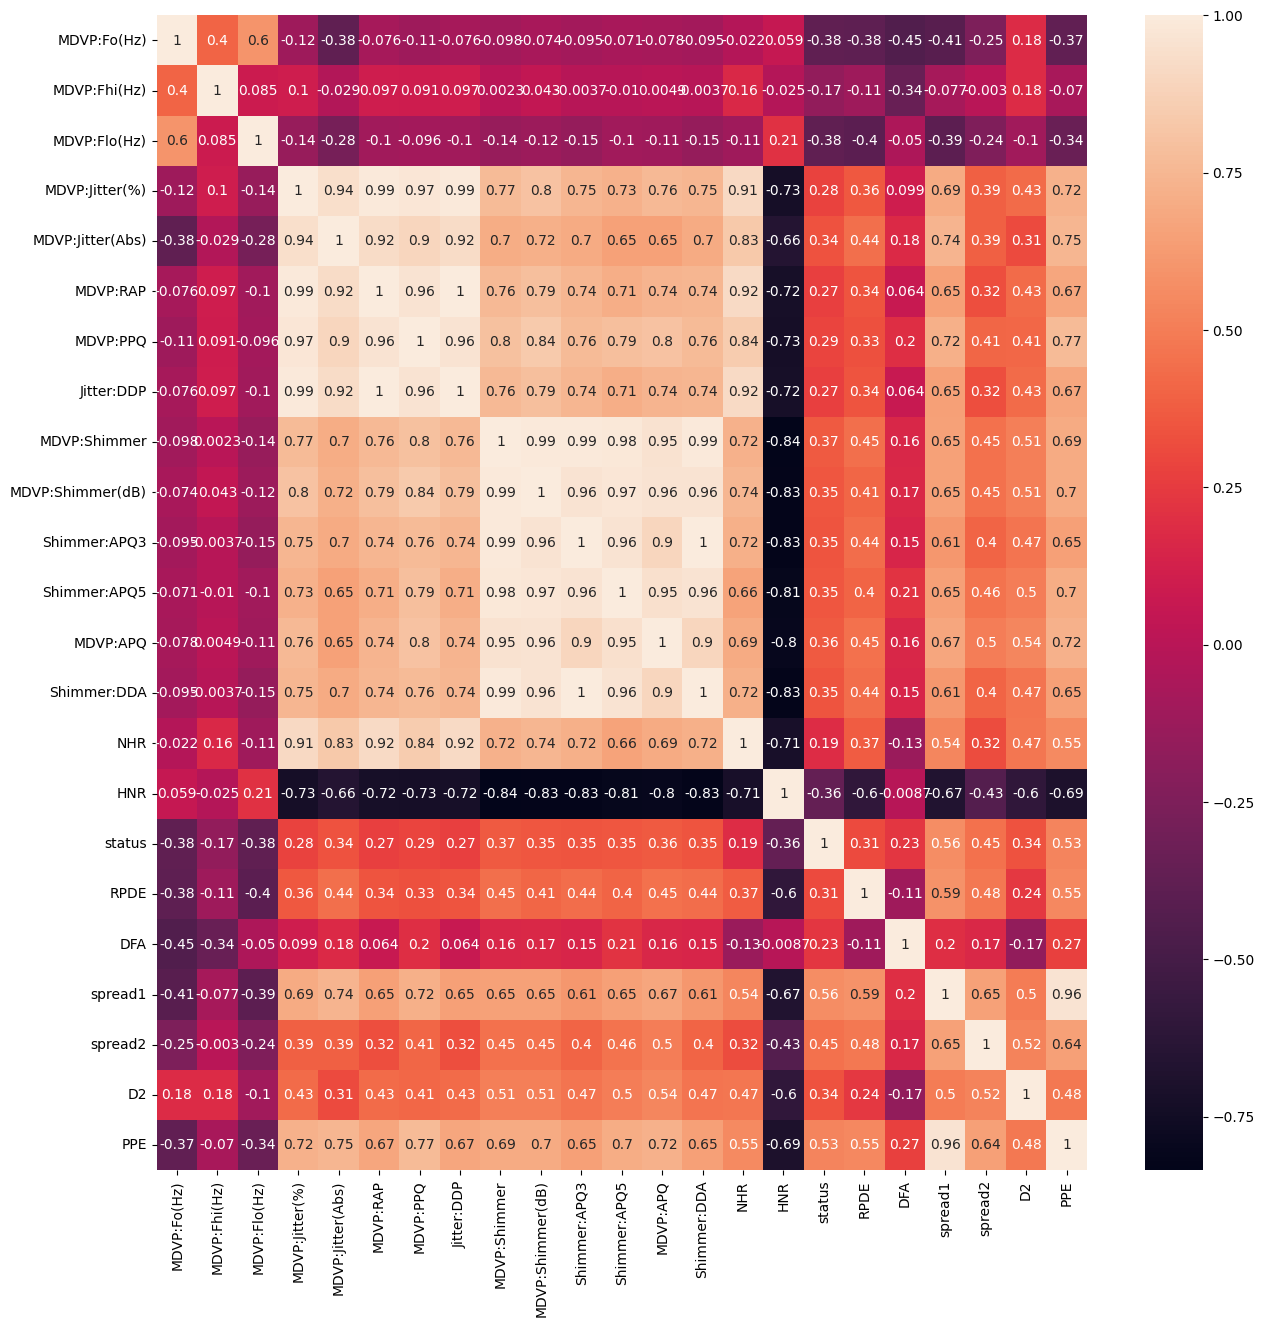

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [149]:
df.corr()['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [150]:
df.corr()['spread1'].sort_values(ascending=False)

spread1             1.000000
PPE                 0.962435
MDVP:Jitter(Abs)    0.735779
MDVP:PPQ            0.716489
MDVP:Jitter(%)      0.693577
MDVP:APQ            0.673158
MDVP:Shimmer        0.654734
MDVP:Shimmer(dB)    0.652547
spread2             0.652358
MDVP:RAP            0.648328
Jitter:DDP          0.648328
Shimmer:APQ5        0.646809
Shimmer:DDA         0.610971
Shimmer:APQ3        0.610967
RPDE                0.591117
status              0.564838
NHR                 0.540865
D2                  0.495123
DFA                 0.195668
MDVP:Fhi(Hz)       -0.076658
MDVP:Flo(Hz)       -0.394857
MDVP:Fo(Hz)        -0.413738
HNR                -0.673210
Name: spread1, dtype: float64

In [151]:
df.corr()['MDVP:Jitter(Abs)'].sort_values(ascending=False)

MDVP:Jitter(Abs)    1.000000
MDVP:Jitter(%)      0.935714
Jitter:DDP          0.922913
MDVP:RAP            0.922911
MDVP:PPQ            0.897778
NHR                 0.834972
PPE                 0.748162
spread1             0.735779
MDVP:Shimmer(dB)    0.716601
MDVP:Shimmer        0.703322
Shimmer:DDA         0.697170
Shimmer:APQ3        0.697153
Shimmer:APQ5        0.648961
MDVP:APQ            0.648793
RPDE                0.441839
spread2             0.388543
status              0.338653
D2                  0.310694
DFA                 0.175036
MDVP:Fhi(Hz)       -0.029198
MDVP:Flo(Hz)       -0.277815
MDVP:Fo(Hz)        -0.382027
HNR                -0.656810
Name: MDVP:Jitter(Abs), dtype: float64

1  --> Parkinson's Positive

0 --> Healthy


In [152]:
# grouping the data based on the target variable
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## Data Pre-Processing
### Separating the features & Target

In [153]:
X = df.drop(columns=['name','status'], axis=1)
y = df['status']

### FEATURE SELECTION


In [154]:
# UNIVARIATE SELECTION
from sklearn.feature_selection import SelectKBest,f_classif
best_feat=SelectKBest(score_func=f_classif,k=7)
fit=best_feat.fit(X,y)

### f_class_if uses ANOVA(here Two-way) to select the best k features

In [155]:
score=pd.DataFrame(fit.scores_)
cols=pd.DataFrame(X.columns)

In [156]:
feat_scores=pd.concat([cols,score],axis=1)
feat_scores.columns=['features','score']

In [157]:
feat_scores

,features,score
0,MDVP:Fo(Hz),33.286577
1,MDVP:Fhi(Hz),5.478255
2,MDVP:Flo(Hz),32.612875
3,MDVP:Jitter(%),16.192809
4,MDVP:Jitter(Abs),25.001729
5,MDVP:RAP,14.775226
6,MDVP:PPQ,17.548533
7,Jitter:DDP,14.772666
8,MDVP:Shimmer,30.122600
9,MDVP:Shimmer(dB),27.065484


In [158]:
print(feat_scores.nlargest(7,'score'))

        features      score
18       spread1  90.424219
21           PPE  75.803195
19       spread2  50.343165
0    MDVP:Fo(Hz)  33.286577
2   MDVP:Flo(Hz)  32.612875
8   MDVP:Shimmer  30.122600
12      MDVP:APQ  29.536350


In [159]:
X=df[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Shimmer','MDVP:APQ','spread1','spread2','PPE']]
y = df['status']

Text(0, 0.5, 'Frequency')

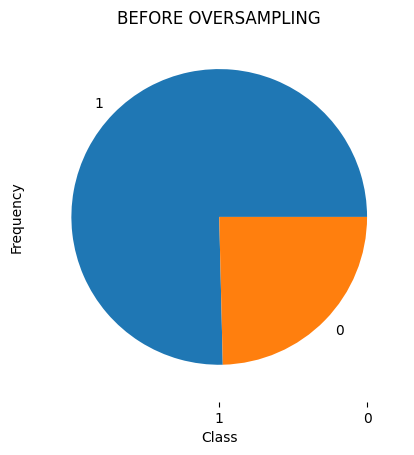

In [160]:
y.value_counts().plot.pie()
plt.title("BEFORE OVERSAMPLING")
plt.xticks(range(2), ['1','0'])
plt.xlabel("Class")
plt.ylabel("Frequency")

### HANDLING THE IMBALACE NATURE IN THE DATASET

## SMOTE ALGORITHM

In [161]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=12,sampling_strategy=1.0) #ratio=1.0 equal as majority class
X_os,y_os=sm.fit_resample(X,y) #X_os-oversampled features, y_os-oversampled feature

## SMOTE-TOMEK LINKS

In [162]:
#from imblearn.over_sampling import SMOTETomek
#smt = SMOTETomek(random_state=42)
#X_res, y_res = smt.fit_resample(X, y)

## USING RANDOM OVERSAMPLER

In [163]:
#from imblearn.over_sampling import RandomOverSampler
#ros=RandomOverSampler(sampling_strategy='not majority')
#X_os,y_os=ros.fit_resample(X,y) #X_os-oversampled features, y_os-oversampled feature

Text(0, 0.5, 'Frequency')

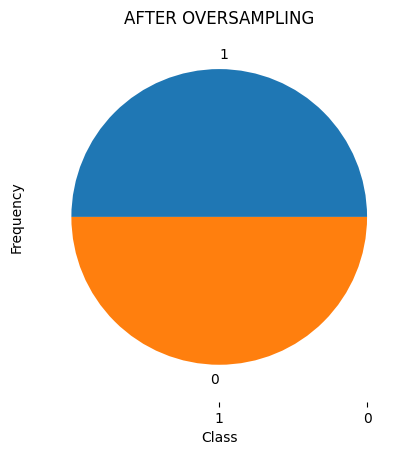

In [164]:
y_os.value_counts().plot.pie()
plt.title("AFTER OVERSAMPLING")
plt.xticks(range(2), ['1','0'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.33, random_state=42)

In [166]:
print(X.shape, X_train.shape, X_test.shape)

(195, 7) (196, 7) (98, 7)


## 1) LOGISTIC REGRESSION 

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'penalty': ['l1', 'l2'],  # regularization penalty type
    'max_iter': [100, 500, 1000],  # maximum number of iterations for convergence
}
lr=LogisticRegression()
grid=GridSearchCV(lr,param_grid=param_grid_lr)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']})

In [168]:
grid.best_params_

{'C': 100, 'max_iter': 100, 'penalty': 'l2'}

In [169]:
lr=LogisticRegression(C=0.01,max_iter=100,penalty='l2')
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Accuracy score of test data : ', accuracy_score(y_test,pred_lr)*100)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of test data :  71.42857142857143
[[27 17]
 [11 43]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        44
           1       0.72      0.80      0.75        54

    accuracy                           0.71        98
   macro avg       0.71      0.70      0.71        98
weighted avg       0.71      0.71      0.71        98



### MATTHEW'S CORRELATION COEFFICIENT  OR PHI-COEFFICIENT
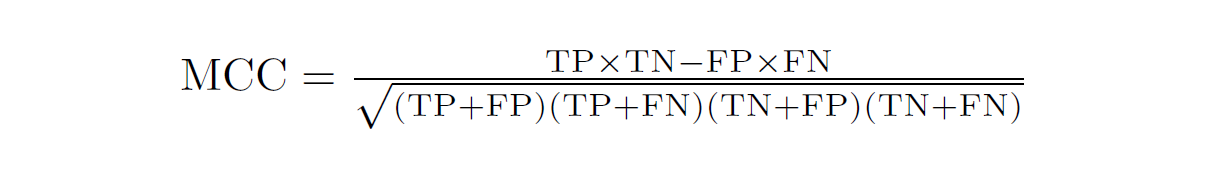

In [170]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,pred_lr))

0.4184738410018143


Text(50.722222222222214, 0.5, 'ACTUAL')

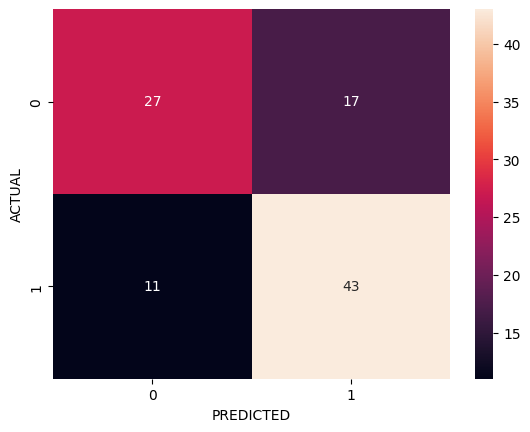

In [171]:
sns.heatmap(confusion_matrix(y_test,pred_lr),annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

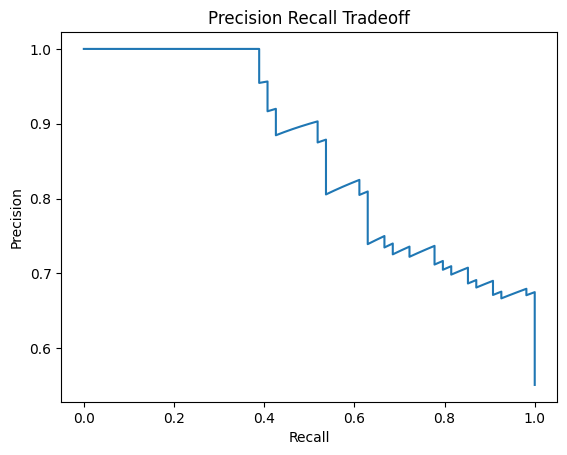

In [172]:
y_decision_function = lr.decision_function(X_test)
precision,recall,threshold = precision_recall_curve(y_test,y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

                                              RECEIVER OPERATING CHARACTERISTIC CURVE                                              
THE AREA UNDER CURVE(AUC) SCORE IS: 0.8577441077441077


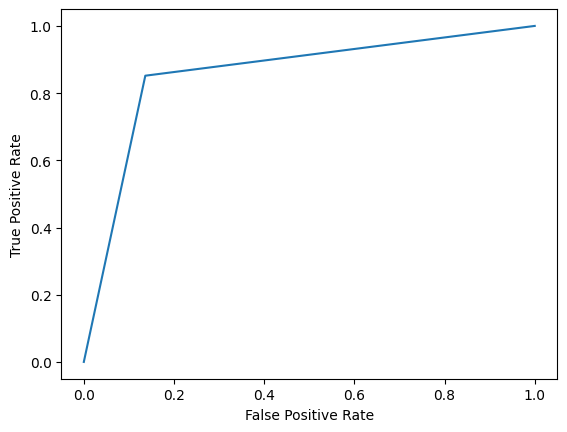

In [173]:
import shutil
columns = shutil.get_terminal_size().columns
print(color.BOLD + 'RECEIVER OPERATING CHARACTERISTIC CURVE'.center(columns) + color.END)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_svm, pos_label=svm_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(color.BOLD+"THE AREA UNDER CURVE(AUC) SCORE IS:",roc_auc_score(y_test, pred_svm))


## 2) GAUSSIAN KERNEL Support Vector Machine Model

In [174]:
svm_model = svm.SVC(kernel='rbf') #SVM MODEL WITH GAUSSIAN KERNEL

In [175]:
# training the SVM model with training data
svm_model.fit(X_train, y_train)

SVC()

In [176]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # kernel coefficient
    'kernel': ['rbf'],  # kernel function type
}

In [177]:
grid_svm=GridSearchCV(svm_model,param_grid=param_grid_svm)
grid_svm.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['rbf']})

In [178]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [179]:
svm_model = svm.SVC(kernel='rbf',C=10,gamma=0.1)
svm_model.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

### SAVING THE MODEL

In [180]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

**Model Evalution**

In [181]:
pred_svm=svm_model.predict(X_test)

## PERFORMANCE METRICS

In [182]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_svm))
print("CONFUSION MATRIX AND CLASSIFICATION REPORT FOR THE SUPPORT VECTOR MACHINE")
pd.crosstab(y_test, pred_svm, rownames = ['Actual'], colnames =['Predicted'], margins = True)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.88      0.85      0.87        54

    accuracy                           0.86        98
   macro avg       0.86      0.86      0.86        98
weighted avg       0.86      0.86      0.86        98

CONFUSION MATRIX AND CLASSIFICATION REPORT FOR THE SUPPORT VECTOR MACHINE


Predicted,0,1,All
Actual,,,
0,38,6,44
1,8,46,54
All,46,52,98


Text(50.722222222222214, 0.5, 'ACTUAL')

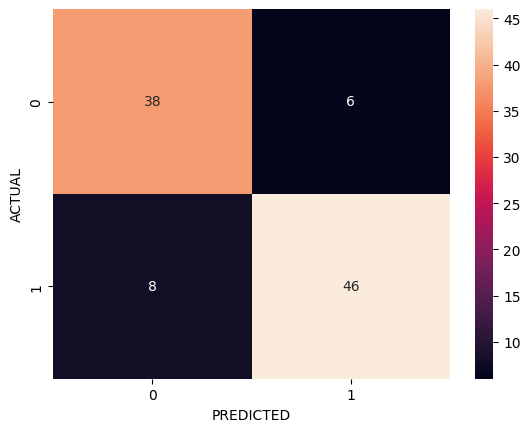

In [183]:
sns.heatmap(confusion_matrix(y_test,pred_svm),annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

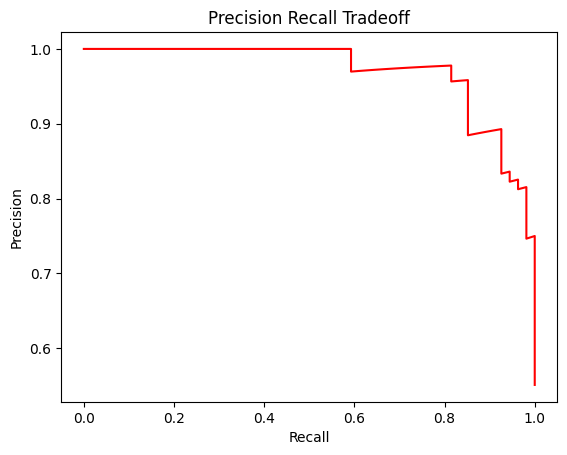

In [214]:
y_decision_function = svm_model.decision_function(X_test)
precision,recall,threshold = precision_recall_curve(y_test,y_decision_function)
plt.plot(recall,precision,color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

                                              RECEIVER OPERATING CHARACTERISTIC CURVE                                              
THE AREA UNDER CURVE(AUC) SCORE IS: 0.8577441077441077


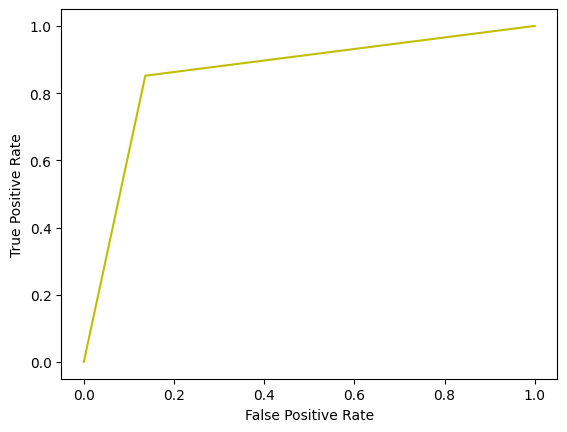

In [217]:
import shutil
columns = shutil.get_terminal_size().columns
print(color.BOLD + 'RECEIVER OPERATING CHARACTERISTIC CURVE'.center(columns) + color.END)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_svm, pos_label=svm_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(color='y')
print(color.BOLD+"THE AREA UNDER CURVE(AUC) SCORE IS:",roc_auc_score(y_test, pred_svm))

In [186]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,pred_svm))

0.7130912633061056


## 3) RANDOM FOREST MODEL

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [188]:
n_estimators=[64,128,256]
max_features=[i for i in range(1,8)]
bootstrap=[True,False]
oob_score=[True,False]
param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [189]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rf,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [64, 128, 256],
                         'oob_score': [True, False]})

In [190]:
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [191]:
rfc_model=RandomForestClassifier(max_features=1,n_estimators=256,bootstrap=True,oob_score=False)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=256)

In [192]:
pred_r=rfc_model.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Accuracy score of test data : ', accuracy_score(y_test,pred_r)*100)
print(confusion_matrix(pred_r,y_test))
print(classification_report(pred_r,y_test))

Accuracy score of test data :  97.95918367346938
[[43  1]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.98      0.98      0.98        54

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



In [194]:
joblib.dump(rfc_model, 'rfc_model.pkl')

['rfc_model.pkl']

In [195]:
rfc_model.predict([[122.964,114.676,0.01681,0.01400,-6.482096,0.264967,0.128872]])

array([0], dtype=int64)

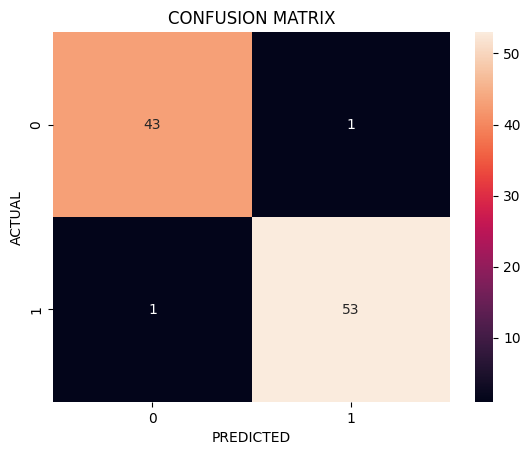

In [196]:
sns.heatmap(confusion_matrix(pred_r,y_test),annot=True)
plt.title("CONFUSION MATRIX")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

                                                      PRECISON RECALL TRADEOFF                                                     


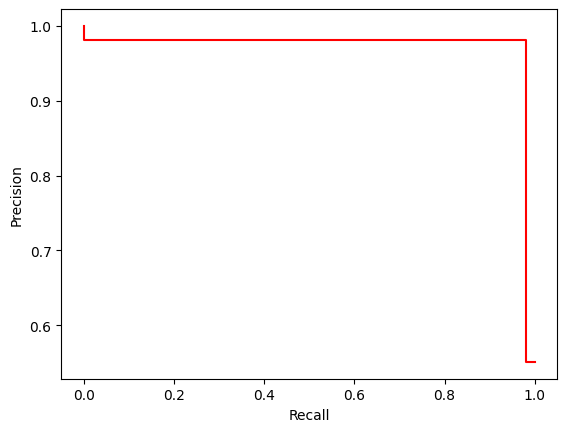

In [218]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print(color.BOLD + 'PRECISON RECALL TRADEOFF'.center(columns) + color.END)
prec, recall, _ = precision_recall_curve(y_test, pred_r, pos_label=rfc_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(color='r')

                                              RECEIVER OPERATING CHARACTERISTIC CURVE                                              

THE AREA UNDER CURVE(AUC) SCORE IS: 0.9793771043771043


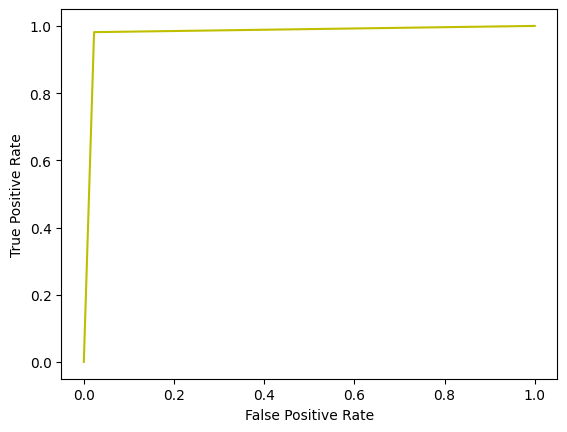

In [219]:
print(color.BOLD + 'RECEIVER OPERATING CHARACTERISTIC CURVE'.center(columns) + color.END)
print()
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
y_score = rfc_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_r, pos_label=rfc_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(color='y')
print(color.BOLD+"THE AREA UNDER CURVE(AUC) SCORE IS:",roc_auc_score(y_test, pred_r))

In [199]:
from sklearn.metrics import matthews_corrcoef
print(color.BOLD,"MATTHEW CORRELATION:",matthews_corrcoef(y_test,pred_r))

 MATTHEW CORRELATION: 0.9587542087542088


## 4) K-Nearest NeigNeighbours 

In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

In [201]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=101)

In [202]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(n_neighbors=10)

In [203]:
#NUMBER OF INSTANCES IS 195, SO I DECIDED TO ITERATE TO THE MAX OF SQRT(195)~
max_n=math.ceil(np.sqrt(195))
k_range = list(range(5, max_n))
param_grid_kn = dict(n_neighbors=k_range)

In [204]:
grid=GridSearchCV(knn,param_grid=param_grid_kn)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13]})

In [205]:
grid.best_params_

{'n_neighbors': 7}

In [206]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(n_neighbors=7)

In [207]:
pred_k=knn.predict(X_test_sc)

In [208]:
print('Accuracy score of test data : ', accuracy_score(y_test_sc,pred_k)*100)
print(confusion_matrix(pred_k,y_test_sc))
print(classification_report(pred_k,y_test_sc))

Accuracy score of test data :  94.87179487179486
[[10  1]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.96      0.96      0.96        28

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



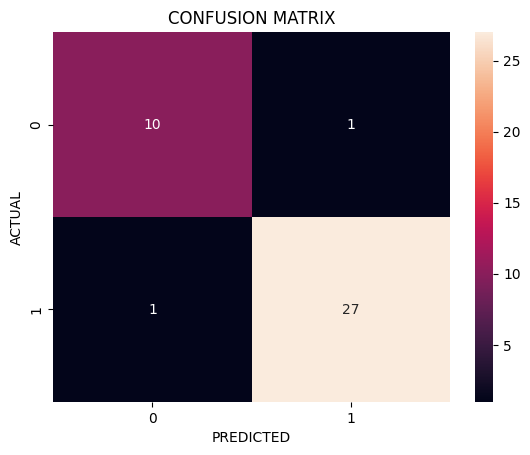

In [209]:
sns.heatmap(confusion_matrix(pred_k,y_test_sc),annot=True)
plt.title("CONFUSION MATRIX")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

                                                      PRECISON RECALL TRADEOFF                                                     


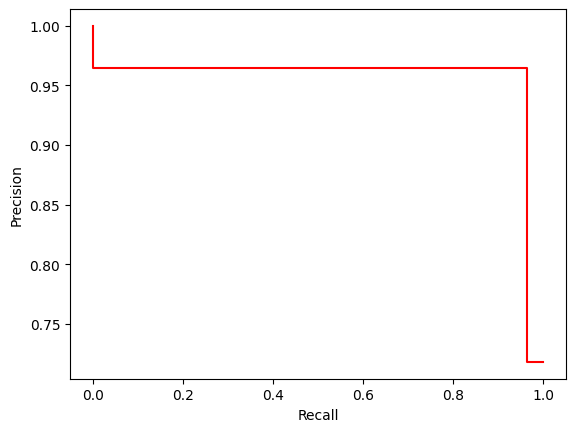

In [220]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print(color.BOLD + 'PRECISON RECALL TRADEOFF'.center(columns) + color.END)
prec, recall, _ = precision_recall_curve(y_test_sc,pred_k, pos_label=knn.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(color='r')

                                              RECEIVER OPERATING CHARACTERISTIC CURVE                                              
THE AREA UNDER CURVE(AUC) SCORE IS: 0.9366883116883118


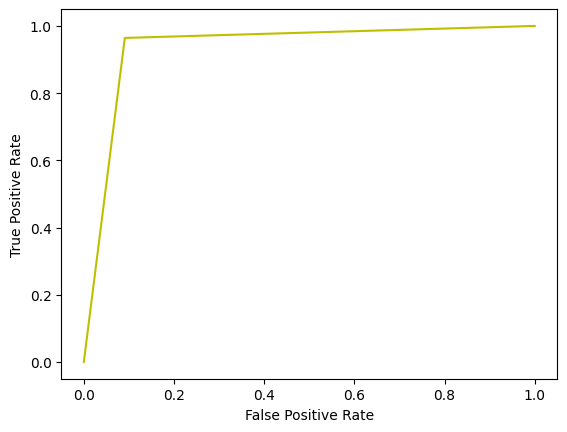

In [222]:
print(color.BOLD + 'RECEIVER OPERATING CHARACTERISTIC CURVE'.center(columns) + color.END)
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = knn.predict_proba(X_test_sc)
fpr, tpr, _ = roc_curve(y_test_sc,pred_k, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(color='y')
print(color.BOLD+"THE AREA UNDER CURVE(AUC) SCORE IS:",roc_auc_score(y_test_sc,pred_k))

In [212]:
from sklearn.metrics import matthews_corrcoef
print(color.BOLD,"MATTHEW CORRELATION:",matthews_corrcoef(y_test_sc,pred_k))

 MATTHEW CORRELATION: 0.8733766233766234


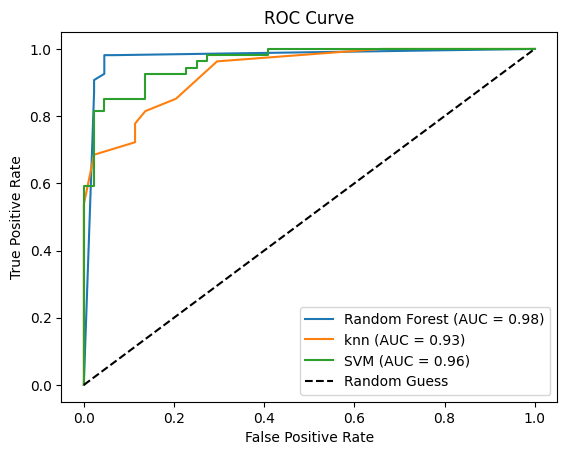

In [224]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = {
    "Random Forest": RandomForestClassifier(bootstrap=False, max_features=10, n_estimators=64),
    "knn": KNeighborsClassifier(n_neighbors=10),
    "SVM": svm.SVC(kernel='rbf',C=10,gamma=0.1,probability=True)
}

# Looping through each classifier to train and evaluate it
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the ROC curve for each classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()